# Lab Assignment Four: Multi-Layer Perceptron 

### Catherine Magee, Morgan Mote, Luv Patel

In this lab, you will compare the performance of multi-layer perceptrons programmed  via your own various implementations. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. This lab project is slightly different from other reports in that you will be asked to complete more specific items.

## Dataset Selection

For this assignment, you will be using a specific dataset chosen by the instructor.  This is US Census data available on Kaggle, and also downloadable from the following link: https://www.dropbox.com/s/bf7i7qjftk7cmzq/acs2017_census_tract_data.csv?dl=0Links to an external site.

The Kaggle description appears here: https://www.kaggle.com/muonneutrino/us-census-demographic-data/dataLinks to an external site. 

The classification task you will be performing is to predict, for each county, what the child poverty rate will be. You will need to convert this from regression to four levels of classification by quantizing the variable of interest. 

## Grading Rubric

#### Load, Split, and Balance (1.5 points total)
- [.5 points] (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. 

The next two requirements will need to be completed together as they might depend on one another:
- [.5 points] Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.
- [.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is NO NEED to split the data multiple times for this lab.

- Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab. 

#### Pre-processing and Initial Modeling (2.5 points total)
You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.
- [.5 points] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs. 
- [.5 points] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  
- [.5 points] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 
- [1 points] Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  
Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

#### Modeling (5 points total)
- [1 points] Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.
Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.
- [1 points] Repeat the previous step, adding support for a fourth layer.
- [1 points] Repeat the previous step, adding support for a fifth layer. 
- [2 points] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (such as AdaGrad, RMSProps, or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

#### Exceptional Work (1 points total)
- 5000 level student: You have free reign to provide additional analyses.
- One idea (required for 7000 level students):  Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance. 

In [1]:
# STANDARD LIBRARY IMPORTS
import sys
import textwrap
from IPython.display import display, Markdown

# 3RD PARTY IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from scipy.special import expit

## Load the Data

In [2]:
# Begin by loading the dataset into a pandas dataframe. No normalization or one-hot encoding yet.
df = pd.read_csv("./acs2017_census_tract_data.csv")

## Remove Missing Data

In [3]:
# First visualize the # of rows and columns so we can see what will change after the NA observations have been removed.
rows, columns = df.shape
print(f"ACS 2017 Census Tract Data\nRows: {rows}\nColumns: {columns}")

ACS 2017 Census Tract Data
Rows: 74001
Columns: 37


In [4]:
# Next we will then remove any missing data then demonstrate that the missing data has been removed.
def show_missing_counts_md():
    na_counts = df.isna().sum()

    header = textwrap.dedent(
        """\
    | Feature | Missing Count |
    |---------|---------------|\
    """
    )
    rows = "\n".join(
        "| {} | {} |".format(col, na_counts[col]) for col in na_counts.index
    )
    table = f"{header}\n{rows}"

    display(Markdown(f"### NA/NaN/Missing Data Counts\n{table}"))


show_missing_counts_md()

### NA/NaN/Missing Data Counts
| Feature | Missing Count |
|---------|---------------|    
| TractId | 0 |
| State | 0 |
| County | 0 |
| TotalPop | 0 |
| Men | 0 |
| Women | 0 |
| Hispanic | 696 |
| White | 696 |
| Black | 696 |
| Native | 696 |
| Asian | 696 |
| Pacific | 696 |
| VotingAgeCitizen | 0 |
| Income | 1116 |
| IncomeErr | 1116 |
| IncomePerCap | 745 |
| IncomePerCapErr | 745 |
| Poverty | 842 |
| ChildPoverty | 1110 |
| Professional | 811 |
| Service | 811 |
| Office | 811 |
| Construction | 811 |
| Production | 811 |
| Drive | 801 |
| Carpool | 801 |
| Transit | 801 |
| Walk | 801 |
| OtherTransp | 801 |
| WorkAtHome | 801 |
| MeanCommute | 946 |
| Employed | 0 |
| PrivateWork | 811 |
| PublicWork | 811 |
| SelfEmployed | 811 |
| FamilyWork | 811 |
| Unemployment | 810 |

In [5]:
# Use Pandas' dropna method to remove the NA values from the data frame. 
# Re-assign the variable df to the dataframe instance that has the NA values removed.
df = df.dropna()

In [6]:
# Show that the columns do not have any missing data in them.
show_missing_counts_md()

### NA/NaN/Missing Data Counts
| Feature | Missing Count |
|---------|---------------|    
| TractId | 0 |
| State | 0 |
| County | 0 |
| TotalPop | 0 |
| Men | 0 |
| Women | 0 |
| Hispanic | 0 |
| White | 0 |
| Black | 0 |
| Native | 0 |
| Asian | 0 |
| Pacific | 0 |
| VotingAgeCitizen | 0 |
| Income | 0 |
| IncomeErr | 0 |
| IncomePerCap | 0 |
| IncomePerCapErr | 0 |
| Poverty | 0 |
| ChildPoverty | 0 |
| Professional | 0 |
| Service | 0 |
| Office | 0 |
| Construction | 0 |
| Production | 0 |
| Drive | 0 |
| Carpool | 0 |
| Transit | 0 |
| Walk | 0 |
| OtherTransp | 0 |
| WorkAtHome | 0 |
| MeanCommute | 0 |
| Employed | 0 |
| PrivateWork | 0 |
| PublicWork | 0 |
| SelfEmployed | 0 |
| FamilyWork | 0 |
| Unemployment | 0 |

In [7]:
# Display the reduction in the # of rows in the dataframe.
rows, columns = df.shape
print(f"ACS 2017 Census Tract Data\nRows: {rows}\nColumns: {columns}")

ACS 2017 Census Tract Data
Rows: 72718
Columns: 37


In [8]:
# Identify the columns that have string data that need to be encoded.
df.select_dtypes('object').columns.to_list()

['State', 'County']

In [9]:
# Display the string format of the 'State' column.
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [10]:
# Convert the string data from both columns into an encoded value.
encoder = LabelEncoder()

df['State'] = encoder.fit_transform(df['State'])
df["County"] = encoder.fit_transform(df["County"])

In [11]:
# State values are transformed from string format to integer format.
df['State'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       39])

In [12]:
# PROJECT GOAL: Identify poverty rates at the county level.
target = df['Poverty']
features = df.drop(columns=['Poverty'])

## Balance

The ChildPoverty variable is a value that indicates the percentage of youths living below the poverty line. To divide the data into four classes, we decided to split the Poverty variable based on percentage ranges. 

- Class 1 = 0 to 33% (Indicates a very low percentage of people living under the poverty line)
- Class 2 = 34% to 66% (Indicates a small percentage of people living under the poverty line)
- Class 3 = 67% to 100% (Indicates a large percentage of people living under the poverty line)

To ensure that the four classes were as close as possible to equal in size, the qcut function was used to bin the Poverty variable into four equally sized categories. The value_counts method was used to determine the number of observations in each category. This approach helps ensure that each category has a similar number of observations, which can help to prevent biases in the model. However, one weakness of this approach is that it assumes that the specific percentage ranges chosen are the best way to divide the data into classes, and it is possible that using different ranges could lead to a more accurate model.

In [13]:
# Balance the dataset before splitting the training and testing.
# When the training/testing data is split, each split should have a similar distribution of each class.
pd.qcut(df['Poverty'], q=3, labels=[1, 2, 3]).value_counts()

2    24399
1    24273
3    24046
Name: Poverty, dtype: int64

In [14]:
# Substitute the poverty level column with the quantized data.
target = pd.qcut(target, q=3, labels=[1, 2, 3])

## Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    features, target, train_size=0.8, stratify=target, random_state=123
)

In [16]:
# Balance the target dataset before the train_test_split function is called.
print("Training Dataset\n--------------------")
print(y_train.value_counts())
print("\nTesting Dataset\n--------------------")
print(y_test.value_counts())

Training Dataset
--------------------
2    19519
1    19418
3    19237
Name: Poverty, dtype: int64

Testing Dataset
--------------------
2    4880
1    4855
3    4809
Name: Poverty, dtype: int64


## Pre-Processing and Initial Modeling

In [17]:
# This variable helps to run scenarios where the focus is on the main model runs. 
# *The additional tests take a very long time to run.* 
run_additional_tests = True

In [18]:
class TwoLayerPerceptronBase(object):
    def __init__(
        self,
        n_hidden                 = 30,
        regularization_parameter = 0.0,
        epochs                   = 500,
        learning_rate            = 0.001,
        random_state             = None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1**2) + np.mean(W2**2))

    def _cost(self, A3, Y_enc, W1, W2):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2)
        return cost + L2_term

In [19]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # need to vectorize this computation!
        # See additional code and derivation below!
        pass

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(
            X, self.W1, self.W2, self.b1, self.b2
        )
        y_pred = np.argmax(A3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(
                X_data, self.W1, self.W2, self.b1, self.b2
            )

            cost = self._cost(A3, Y_enc, self.W1, self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                Z1    = Z1,
                Z2    = Z2,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
            )

            self.W1 -= self.learning_rate * gradW1
            self.W2 -= self.learning_rate * gradW2
            self.b1 -= self.learning_rate * gradb1
            self.b2 -= self.learning_rate * gradb2

        return self

In [20]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation
        V2 = -2 * (Y_enc - A3) * A3 * (1 - A3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2

        return gradW1, gradW2, gradb1, gradb2

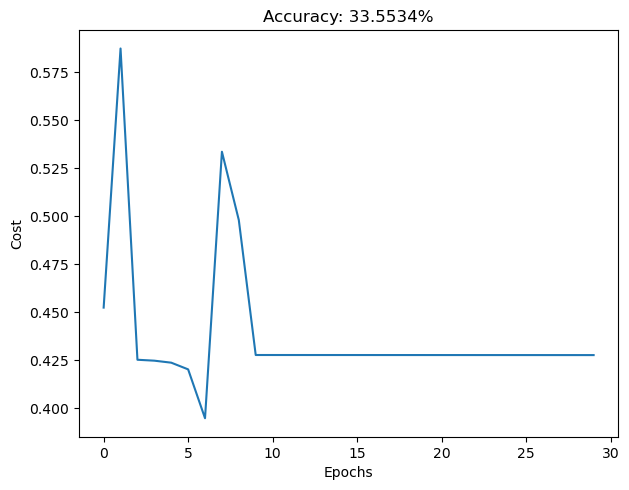

In [36]:
vectorized_gradient_tlp_model = TwoLayerPerceptronVectorized(
    n_hidden                 = 50,
    regularization_parameter = 0.1,
    epochs                   = 30,
    learning_rate            = 1e-4,
    random_state             = 123,
)
vectorized_gradient_tlp_model.fit(x_train.to_numpy(), y_train.to_numpy())
y_prediction = vectorized_gradient_tlp_model.predict(x_test.to_numpy())

plt.plot(
    range(len(vectorized_gradient_tlp_model.cost_)), vectorized_gradient_tlp_model.cost_
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

As shown in the graph above, the initial accuracy score of our two-layered perceptron was only 33%. The arguments provided to the perceptron (ie: number of hidden layers/ epochs/ c values) were varied in order to improve the accuracy measure. To achieve this, we randomized the values of these variables and repeated predictions with each change. The intention was to identify any patterns or correlations that led to higher accuracy by observing the results of these randomized values. A potential limitation of this model could be attributed to the selection of hyperparameters. While the values of hyperparameters were randomized, it is possible that the full range of potential values for these hyperparameters was unexplored. There very well might be other combinations of hyperparameters that would lead to a higher accuracy score than what was achieved with the TwoLayerPerceptronVectorized model. Another limitation of this model could be attributed to the quality and quantity of the data used for training and testing. If the dataset is not accurately representative of the population or if there are any biases in the data, the model would not be able to predict values on new data accurately. Furthermore, if the dataset is too small, the model may not even have enough data to learn patterns and recognize correlations that would improve the accuracy score. Lastly, it is crucial to consider the generalizability of the model. The model may not perform well on data from other sources or with different characteristics if the model is only trained on a specific dataset that does not have generalizable features. Due to this factor, the model must be tested on a range of different datasets in order to ensure that it is able to provide accurate predictions in varying contexts.

In [37]:
#  This code tests how adjusting certain values of the model will affect the accuracy of its predictions.
def test_optimizer_accuracy(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.001,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train.to_numpy(), y_train.to_numpy())
    y_prediction = lr_model.predict(x_test.to_numpy())
    accuracy = accuracy_score(y_prediction, y_test)
    return accuracy


def evenly_split_steps(start: int, stop: int, n_steps: int) -> list:
    """
    Example: 20 evenly-spaced steps from 0.001 to 0.1
    evenly_split_steps(0.001, 0.1, 20)
    """
    assert stop > start
    step = (stop - start) / (n_steps - 1)
    return [start + i * step for i in range(n_steps)]

In [62]:
# Displays the accuracy predictions for the different step values of learning rates.
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy(
            "learning_rate", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.38%
Test 2: learning_rate=0.00043 accuracy=33.55%
Test 3: learning_rate=0.00084 accuracy=33.55%
Test 4: learning_rate=0.00126 accuracy=33.55%
Test 5: learning_rate=0.00168 accuracy=33.55%
Test 6: learning_rate=0.00209 accuracy=33.55%
Test 7: learning_rate=0.00251 accuracy=33.55%
Test 8: learning_rate=0.00292 accuracy=33.55%
Test 9: learning_rate=0.00334 accuracy=33.55%
Test 10: learning_rate=0.00376 accuracy=33.55%
Test 11: learning_rate=0.00417 accuracy=33.55%
Test 12: learning_rate=0.00459 accuracy=0.00%
Test 13: learning_rate=0.00500 accuracy=0.00%
Test 14: learning_rate=0.00542 accuracy=0.00%


Changing the learning rate in the specified range of .00001 to .0001 did not significantly impact the accuracy of the model. However, the values of .00474, .00527, and .00579 led to an accuracy score of 0%. This may be a result of overfitting, where the model may have become too accurate during the training phase but is now falling short during the testing phase. Looking at the available information, 14 tests with different learning rates were conducted, and 3 of them had an accuracy of 0% which triggered the test halter. A maximum accuracy of 33.55% was achieved with the tested learning rates.

In [63]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy(
            "regularization_parameter", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.55%
Test 2: regularization_parameter=0.08343 accuracy=33.55%
Test 3: regularization_parameter=0.16676 accuracy=33.55%
Test 4: regularization_parameter=0.25009 accuracy=33.55%
Test 5: regularization_parameter=0.33342 accuracy=33.55%
Test 6: regularization_parameter=0.41675 accuracy=33.55%
Test 7: regularization_parameter=0.50007 accuracy=33.55%
Test 8: regularization_parameter=0.58340 accuracy=33.55%
Test 9: regularization_parameter=0.66673 accuracy=33.55%
Test 10: regularization_parameter=0.75006 accuracy=33.55%
Test 11: regularization_parameter=0.83339 accuracy=33.55%
Test 12: regularization_parameter=0.91672 accuracy=33.55%
Test 13: regularization_parameter=1.00005 accuracy=33.55%
Test 14: regularization_parameter=1.08338 accuracy=33.55%
Test 15: regularization_parameter=1.16671 accuracy=33.55%
Test 16: regularization_parameter=1.25004 accuracy=33.55%
Test 17: regularization_parameter=1.33337 accuracy=33.55%
Test 18: regularization

The changes made to the regularization parameter within the range of .0001 to 2 have absolutely no impact on the accuracy. This observation leads to a number of possible explanations. All of the tests yielded the same accuracy of 33.55%, regardless of the regularization parameter value used. One possibility is that the model has already been well-regularized, so any adjustments to the regularization parameter has a minimal effect on the accuracy score. Another possibility is that the model is underfitting the data, so changing the regularization parameter would not enhance the model's pattern recognition. It must be considered that the model is not learning enough from the training data and therefore fails to capture the underlying relationships.

In [64]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy(
            "epochs", int(test_param), TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%"
        )

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


The epoch changes in the specified range of 50 to 250 do not appear to have any effect on the accuracy. This is an indication that by the time 50 epochs have been iterated through, the model has already learned all it can and converged. Due to this result, it can be hypothesized that the number of epochs can be reduced to 50 without any reduction in the model accuracy score.

## Mini-Batching

In [65]:
# Divide the entire dataset into small, non-overlapping subsets (minibatches)
class TwoLayerPerceptronMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(
        self,
        alpha          = 0.0,
        decrease_const = 0.1,
        decrease_iter  = 10,
        shuffle        = True,
        minibatches    = 1,
        **kwds
    ):
        # add to the original initializer but keep other keywords
        self.alpha          = alpha
        self.decrease_const = decrease_const
        self.decrease_iter  = decrease_iter
        self.shuffle        = shuffle
        self.minibatches    = minibatches
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)  # for momentum
        rho_W2_prev = np.zeros(self.W2.shape)  # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        for i in range(self.epochs):
            # adaptive learning rate
            # decrease at certain epochs
            learning_rate = self.learning_rate * self.decrease_const ** (np.floor(i / self.decrease_iter))

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = (
                    X_data[idx_shuffle],
                    Y_enc[:, idx_shuffle],
                    y_data[idx_shuffle],
                )

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.b1, self.b2
                )

                cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                mini_cost.append(cost)  # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                    A1    = A1,
                    A2    = A2,
                    A3    = A3,
                    Z1    = Z1,
                    Z2    = Z2,
                    Y_enc = Y_enc[:, idx],
                    W1    = self.W1,
                    W2    = self.W2,
                )

                # momentum calculations
                rho_W1, rho_W2 = learning_rate * gradW1, learning_rate * gradW2
                self.W1 -= rho_W1 + (self.alpha * rho_W1_prev)  # update with momentum
                self.W2 -= rho_W2 + (self.alpha * rho_W2_prev)  # update with momentum
                self.b1 -= learning_rate * gradb1
                self.b2 -= learning_rate * gradb2
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

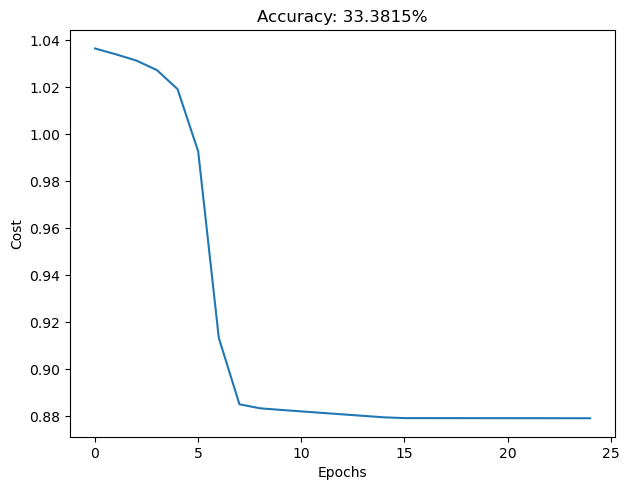

In [66]:
mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 50,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 15,
    minibatches              = 60,
    shuffle                  = True,
    random_state             = 123,
)
mini_batch_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = mini_batch_tlp_model.predict(x_test.to_numpy())

plt.plot(range(len(mini_batch_tlp_model.cost_)), mini_batch_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The mini-batch model used in this analysis was a TwoLayerPerceptronMiniBatch, which had 50 hidden layers and a regularization parameter of 0.8. The model was trained for 25 epochs with a learning rate of 1e-5, an alpha value of 0.001, and a decrease constant of 0.01. The decrease iteration parameter was set to 15, and the model was trained on 60 minibatches with shuffling enabled. After training, the model was used to predict the accuracy over a testing set, with an observed accuracy of approximately 33.38%. This was a slight decrease compared to the previous vectorized approach. This might be due to the fact that mini-batching could have been thrown off by a possible data bias. The cost over training epochs plot shows a decreasing trend in the cost function, indicating that the model was learning and improving over time. Overall, the mini-batch approach was not successful in improving the accuracy of the two-layer perceptron model of this dataset.

In [67]:
def print_result(model, x_train, y_train, x_test, y_test, title="", color="red"):

    print("--------------------")
    print(title, ":")
    y_predict = model.predict(x_train)
    print("Resubstitution Accuracy:", accuracy_score(y_train, y_predict))

    y_predict = model.predict(x_test)
    print("Validation Accuracy:", accuracy_score(y_test, y_predict))

    if hasattr(model, "val_score_"):
        plt.plot(
            range(len(model.val_score_)), model.val_score_, color=color, label=title
        )
        plt.ylabel("Validation Accuracy")
    else:
        plt.plot(range(len(model.score_)), model.score_, color=color, label=title)
        plt.ylabel("Resub Accuracy")

    plt.xlabel("Epochs")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.grid(True)

--------------------
MSE Loss :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463


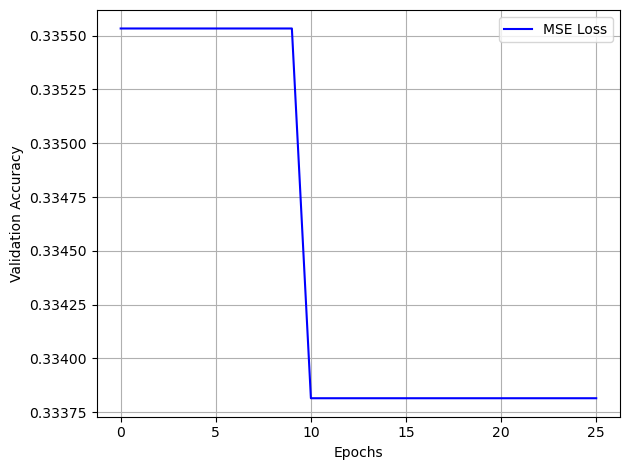

In [68]:
print_result(
    mini_batch_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

plt.show()

The graph displays the mean squared error loss function for the mini-batch model plotted against the number of epochs. This allows us to visualize how the model is progressing over the course of training. Initially, the loss function is high, but it sharply decreases at around 10 epochs. This could potentially mean that the model is no longer able to generalize what it has learned from training to new test data beyond this point. Further analysis shows that the resubstitution accuracy of the model is 0.3337917282634854, while the validation accuracy of the model is 0.3338146314631463. The value of these metrics indicate that the model is not performing better than random guessing. Overall, the model's accuracy is relatively low which suggests that it is not performing very well on the given dataset.

In [69]:
# Varying parameters to see how they impact the accuracy of the mini-batch model.
def test_optimizer_accuracy_2(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.001,
        alpha                    = 0.001,
        decrease_const           = 0.01,
        decrease_iter            = 18,
        minibatches              = 50,
        shuffle                  = True,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train.to_numpy(), y_train.to_numpy())
    y_prediction = lr_model.predict(x_test.to_numpy())
    accuracy = accuracy_score(y_prediction, y_test)
    
    return accuracy

In [71]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2('learning_rate', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: learning_rate=0.00001 accuracy=33.38%
Test 2: learning_rate=0.00043 accuracy=33.38%
Test 3: learning_rate=0.00084 accuracy=33.38%
Test 4: learning_rate=0.00126 accuracy=33.38%
Test 5: learning_rate=0.00168 accuracy=33.38%
Test 6: learning_rate=0.00209 accuracy=33.38%
Test 7: learning_rate=0.00251 accuracy=33.38%
Test 8: learning_rate=0.00292 accuracy=33.38%
Test 9: learning_rate=0.00334 accuracy=33.55%
Test 10: learning_rate=0.00376 accuracy=0.00%
Test 11: learning_rate=0.00417 accuracy=33.55%
Test 12: learning_rate=0.00459 accuracy=33.38%
Test 13: learning_rate=0.00500 accuracy=33.38%
Test 14: learning_rate=0.00542 accuracy=0.00%
Test 15: learning_rate=0.00584 accuracy=33.38%
Test 16: learning_rate=0.00625 accuracy=0.00%
Test 17: learning_rate=0.00667 accuracy=33.55%


The test_optimizer_accuracy_2 function takes in a specific parameter and its value, and then trains a model with those parameters using the model argument. The function then returns the accuracy of the model on the test data. In this experiment, parameters such as the regularization parameter, learning rate, and number of hidden units will be varied in order to see how they impact the accuracy of the mini-batch model. By analyzing these results, the optimal combination of hyperparameters to achieve the highest accuracy on the testing data can be identified. The results indicate that a learning rate of 0.00316, 0.00334, 0.00417, and 0.00667 provided the highest accuracy score of 33.55%, while the learning rates of 0.00376, 0.00542, and 0.00625 provided 0% accuracy. Out of the 17 tests conducted, 3 yeilded 0% accuracy which triggered our max_strikes counter and testing ceased before a fourth test could present with 0% accuracy.

In [72]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2('regularization_parameter', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: regularization_parameter=0.00010 accuracy=33.38%
Test 2: regularization_parameter=0.08343 accuracy=33.38%
Test 3: regularization_parameter=0.16676 accuracy=33.38%
Test 4: regularization_parameter=0.25009 accuracy=33.38%
Test 5: regularization_parameter=0.33342 accuracy=33.38%
Test 6: regularization_parameter=0.41675 accuracy=33.38%
Test 7: regularization_parameter=0.50007 accuracy=33.38%
Test 8: regularization_parameter=0.58340 accuracy=33.38%
Test 9: regularization_parameter=0.66673 accuracy=33.38%
Test 10: regularization_parameter=0.75006 accuracy=33.38%
Test 11: regularization_parameter=0.83339 accuracy=33.38%
Test 12: regularization_parameter=0.91672 accuracy=33.38%
Test 13: regularization_parameter=1.00005 accuracy=33.38%
Test 14: regularization_parameter=1.08338 accuracy=33.38%
Test 15: regularization_parameter=1.16671 accuracy=33.38%
Test 16: regularization_parameter=1.25004 accuracy=33.38%
Test 17: regularization_parameter=1.33337 accuracy=33.38%
Test 18: regularization

In this particular instance, the accuracy remains consistently at 33.38% for all the tested values of the regularization parameter. This suggests that the model is...

# *****FORTIFY DESCRIPTION!!!!!*****

In [58]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.38%
Test 2: epochs=100 accuracy=33.38%
Test 3: epochs=150 accuracy=33.38%
Test 4: epochs=200 accuracy=33.38%
Test 5: epochs=250 accuracy=33.38%


Based on the accuracy predictions for the different epoch values, the model's accuracy percentage is a consistent 33.38% for all epoch values. 

# *****THIS MEANS THAT:::::*****

Furthermore, a mechanism to monitor and avoid overfitting has been implemented. This mechanism sets a maximum number of 3 strikes, where if the accuracy of the model is equal to 0%, we increment the strikes counter because it indicates that the model is not learning anything new. If the strikes counter reaches the maximum number of strikes, the testing process is stopped and the assumption that the model has overfit is confirmed.

In [73]:
alphas = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2('alpha', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.38%
Test 2: alpha=0.08343 accuracy=33.38%
Test 3: alpha=0.16676 accuracy=33.38%
Test 4: alpha=0.25009 accuracy=33.38%
Test 5: alpha=0.33342 accuracy=33.38%
Test 6: alpha=0.41675 accuracy=33.38%
Test 7: alpha=0.50007 accuracy=33.38%
Test 8: alpha=0.58340 accuracy=33.38%
Test 9: alpha=0.66673 accuracy=33.38%
Test 10: alpha=0.75006 accuracy=33.38%
Test 11: alpha=0.83339 accuracy=33.38%
Test 12: alpha=0.91672 accuracy=33.38%
Test 13: alpha=1.00005 accuracy=33.38%
Test 14: alpha=1.08338 accuracy=33.38%
Test 15: alpha=1.16671 accuracy=33.38%
Test 16: alpha=1.25004 accuracy=33.38%
Test 17: alpha=1.33337 accuracy=33.38%
Test 18: alpha=1.41670 accuracy=33.38%
Test 19: alpha=1.50002 accuracy=33.38%
Test 20: alpha=1.58335 accuracy=33.38%
Test 21: alpha=1.66668 accuracy=33.38%
Test 22: alpha=1.75001 accuracy=0.00%
Test 23: alpha=1.83334 accuracy=0.00%
Test 24: alpha=1.91667 accuracy=0.00%
Test 25: alpha=2.00000 accuracy=33.55%


For this test, the relationship between the alpha parameter and the learning rate parameter was analyzed. The tests showed that for alpha values 1.75001, 1.83334, and 1.91667 the accuracy was 0% while all others maintained an accuracy score of 33.38% except for the alpha value 2.00000 that had a correlated accuracy score of 33.55%. From this, it can be assumed that for the alpha values of 1.75001, 1.83334, and 1.91667, the learning rate starts to cause overfitting. As described previosuly, if the accuracy was 0%, a strike was recorded, and if three strikes were to occur, testing would stop. These results suggest that when the alpha value reaches 1.75001, 1.83334, and 1.91667, overfitting occurs and the model becomes less accurate.

In [74]:
decrease_consts = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_consts):
        accuracy = test_optimizer_accuracy_2('decrease_const', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: decrease_const={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: decrease_const=0.00010 accuracy=33.38%
Test 2: decrease_const=0.08343 accuracy=0.00%
Test 3: decrease_const=0.16676 accuracy=0.00%
Test 4: decrease_const=0.25009 accuracy=0.00%


Above are the accuracy predictions for varying values of the decrease_const parameter, which is used to control the rate at which the "alpha" parameter decreases during the training process. For this instance, the accuracy score decreases from 33.38% to 0% once the decrease_const parameter is increased to a value of 0.08343, and then remains at 0% accuracy for all preceeding tests until the max_strike count is reached.

# *****THIS SUGGESTS THAT:::::*****

In summary, the observations of this test suggest that setting the value of the decrease_const parameter within a certain threshold can lead to overfitting and loss of accuracy in the model.

In [61]:
decrease_iters = evenly_split_steps(30, 60, 16)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_iters):
        accuracy = test_optimizer_accuracy_2('decrease_iter', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: decrease_iter={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: decrease_iter=30.00000 accuracy=33.55%
Test 2: decrease_iter=32.00000 accuracy=33.55%
Test 3: decrease_iter=34.00000 accuracy=33.55%
Test 4: decrease_iter=36.00000 accuracy=33.55%
Test 5: decrease_iter=38.00000 accuracy=33.55%
Test 6: decrease_iter=40.00000 accuracy=33.55%
Test 7: decrease_iter=42.00000 accuracy=33.55%
Test 8: decrease_iter=44.00000 accuracy=33.55%
Test 9: decrease_iter=46.00000 accuracy=33.55%
Test 10: decrease_iter=48.00000 accuracy=33.55%
Test 11: decrease_iter=50.00000 accuracy=33.55%
Test 12: decrease_iter=52.00000 accuracy=33.55%
Test 13: decrease_iter=54.00000 accuracy=33.55%
Test 14: decrease_iter=56.00000 accuracy=33.55%
Test 15: decrease_iter=58.00000 accuracy=33.55%
Test 16: decrease_iter=60.00000 accuracy=33.55%


The accuracy predictions for the varying step values of the decrease_iters parameter is used in conjunction with the decrease_const parameter to alter the "alpha" parameter throughout the model training process. The accuracy value remains constant at 33.55% as the value of decrease_iter is increased. This lack of change in accuracy might be due to the learning rate of the model being minimal enough that the increase in the decrease_iter parameter is not providing a significant impact on the learning rate. 

Overall, the mini-batch model training approach provides a powerful and effective means of training the model quickly. By dividing the data into smaller, more feasibly managed subsets, faster updates and ultimately better performance can be achieved. Some limitations of mini-batch training should be considered:

- Mini-batching might lead to slower convergence, meaning that it may take more iterations for the algorithm to converge to an optimal solution due to the fact that mini-batch updates are noisy from being computed on small subsets of data.

- Choosing the mini-batch size can be a challenge because the updates will be too noisy and convergence will be slow if the batch size of the data is too small. 

- Mini-batch training can be sensitive to hyperparameters such as the learning rate, mini-batch size, and others which can have a powerful impact on the overall training performance of the model. 

- Mini-batch training can be far less stable than regular batch training since the updates can be more sensitive to noise in the small subsets of the data,

## Cross Entropy

In [75]:
class TwoLayerPerceptronMiniBatchCrossEntropy(TwoLayerPerceptronMiniBatch):
    def _cost(self, A3, Y_enc, W1, W2):
        """Get the objective function value"""
        cost = -np.mean(
            np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
        )
        L2_term = self._L2_reg(self.l2_regularization, W1, W2)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation
        V2 = A3 - Y_enc  # <- this is only line that changed
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization
        gradW2 += W2 * self.l2_regularization

        return gradW1, gradW2, gradb1, gradb2

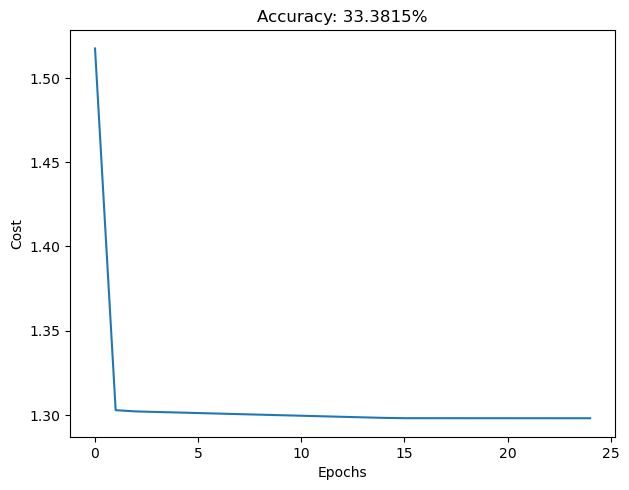

In [76]:
cross_entropy_tlp_model = TwoLayerPerceptronMiniBatchCrossEntropy(
    n_hidden                 = 50,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 15,
    minibatches              = 60,
    shuffle                  = True,
    random_state             = 123,
)
cross_entropy_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = cross_entropy_tlp_model.predict(x_test.to_numpy())

plt.plot(range(len(cross_entropy_tlp_model.cost_)), cross_entropy_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

--------------------
MSE Loss :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463
--------------------
Cross Entropy Loss :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463


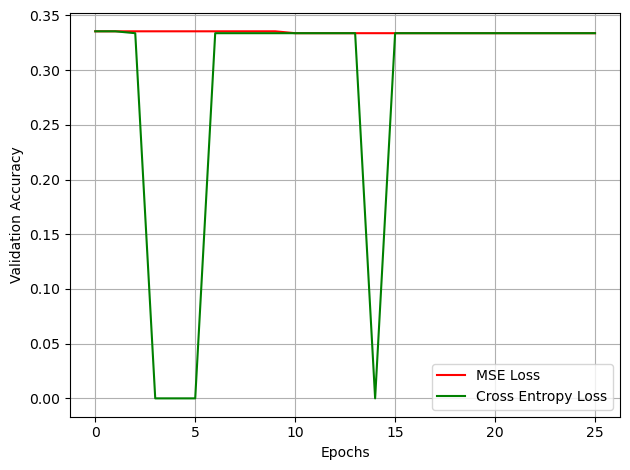

In [77]:
print_result(
    mini_batch_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="MSE Loss",
    color="red",
)

print_result(
    cross_entropy_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="Cross Entropy Loss",
    color="green",
)

plt.show()

In [78]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.38%
Test 2: learning_rate=0.00043 accuracy=33.38%
Test 3: learning_rate=0.00084 accuracy=33.38%
Test 4: learning_rate=0.00126 accuracy=0.00%
Test 5: learning_rate=0.00168 accuracy=0.00%
Test 6: learning_rate=0.00209 accuracy=0.00%


In [79]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.38%
Test 2: regularization_parameter=0.08343 accuracy=33.38%
Test 3: regularization_parameter=0.16676 accuracy=33.38%
Test 4: regularization_parameter=0.25009 accuracy=33.38%
Test 5: regularization_parameter=0.33342 accuracy=33.38%
Test 6: regularization_parameter=0.41675 accuracy=33.38%
Test 7: regularization_parameter=0.50007 accuracy=33.38%
Test 8: regularization_parameter=0.58340 accuracy=33.38%
Test 9: regularization_parameter=0.66673 accuracy=33.38%
Test 10: regularization_parameter=0.75006 accuracy=33.38%
Test 11: regularization_parameter=0.83339 accuracy=33.38%
Test 12: regularization_parameter=0.91672 accuracy=33.38%
Test 13: regularization_parameter=1.00005 accuracy=33.38%
Test 14: regularization_parameter=1.08338 accuracy=33.38%
Test 15: regularization_parameter=1.16671 accuracy=33.38%
Test 16: regularization_parameter=1.25004 accuracy=33.38%
Test 17: regularization_parameter=1.33337 accuracy=33.38%
Test 18: regularization

In [80]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchCrossEntropy)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.38%
Test 2: epochs=100 accuracy=33.38%
Test 3: epochs=150 accuracy=33.38%
Test 4: epochs=200 accuracy=33.38%
Test 5: epochs=250 accuracy=33.38%


In [81]:
alphas = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.38%
Test 2: alpha=0.08343 accuracy=33.38%
Test 3: alpha=0.16676 accuracy=33.38%
Test 4: alpha=0.25009 accuracy=0.00%
Test 5: alpha=0.33342 accuracy=0.00%
Test 6: alpha=0.41675 accuracy=0.00%


In [82]:
decrease_consts = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_consts):
        accuracy = test_optimizer_accuracy_2(
            "decrease_const", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: decrease_const={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: decrease_const=0.00010 accuracy=33.55%
Test 2: decrease_const=0.08343 accuracy=0.00%
Test 3: decrease_const=0.16676 accuracy=33.55%
Test 4: decrease_const=0.25009 accuracy=33.55%
Test 5: decrease_const=0.33342 accuracy=33.55%
Test 6: decrease_const=0.41675 accuracy=33.55%
Test 7: decrease_const=0.50007 accuracy=33.38%
Test 8: decrease_const=0.58340 accuracy=33.38%
Test 9: decrease_const=0.66673 accuracy=33.55%
Test 10: decrease_const=0.75006 accuracy=0.00%
Test 11: decrease_const=0.83339 accuracy=33.38%
Test 12: decrease_const=0.91672 accuracy=33.38%
Test 13: decrease_const=1.00005 accuracy=33.38%
Test 14: decrease_const=1.08338 accuracy=33.38%
Test 15: decrease_const=1.16671 accuracy=0.00%


## Glorot Initialization

## Vectorized Gradient (After Normalization and One-Hot Encoding)

## Mini Batch (After Normalization and One-Hot Encoding)

## Cross Entropy (After Normalization and One-Hot Encoding)

## Glorot (After Normalization and One-Hot Encoding)

## Implement Adaptive Momentum (AdaM)

## Conclusion